In [20]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv('dataset.csv')
#showing our initial dataframe here
dataframe

,ORIGIN,SECTOR,TREATMENT_LOCATION,SEX,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,HOSPITALIZED,ADMISSION DATE,DATE_OF_FIRST_SYMPTOM,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,TOBACCO,ANOTHER CASE,OUTCOME,MIGRANT,COUNTRY OF ORIGIN,ICU
0,OUTSIDE USMER,STATE,2,1,2,2,4,1,2020-04-22,2020-04-18,...,2,2,2,2,2,1,1,99,99,97
1,OUTSIDE USMER,STATE,15,2,15,15,33,2,2020-05-18,2020-05-15,...,2,2,2,1,2,2,1,99,99,2
2,OUTSIDE USMER,STATE,2,1,2,2,2,1,2020-05-22,2020-05-19,...,2,2,1,2,2,1,1,99,99,97
3,OUTSIDE USMER,STATE,15,2,9,15,87,1,2020-06-05,2020-06-04,...,2,2,2,2,1,1,1,99,99,97
4,OUTSIDE USMER,IMSS,25,2,25,25,6,1,2020-04-22,2020-04-18,...,2,2,2,2,2,99,1,99,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159788,USMER,SSA,25,2,25,25,9,1,2020-06-02,2020-05-23,...,2,2,2,2,2,99,1,99,99,97
159789,USMER,SSA,22,1,22,22,12,2,2020-06-04,2020-06-02,...,2,2,2,2,2,2,1,99,99,2
159790,OUTSIDE USMER,SSA,12,2,12,12,50,1,2020-06-04,2020-06-03,...,2,2,1,2,2,1,1,99,99,97
159791,OUTSIDE USMER,IMSS,15,2,15,15,39,1,2020-06-04,2020-06-02,...,2,2,2,2,2,99,1,99,99,97


In [21]:
## Question 1
unmodified = dataframe.copy()

df = pd.read_excel('data_dictionary.xlsx')
dictionary = df.set_index('variable').T.to_dict()

for key, value in dictionary.items():
    for i in value.values():
        res = dict(item.split("=") for item in i.split(", "))
        dictionary[key] = res

dictionary = {outer_k.upper(): {inner_k.replace(' ', ''): inner_v for inner_k, inner_v in outer_v.items()} for outer_k, outer_v in dictionary.items()}

for key, value in dictionary.items():
    dataframe[key]= dataframe[key].astype(str)
    dataframe.replace({key: dictionary[key]}, inplace=True)
    
dataframe

,ORIGIN,SECTOR,TREATMENT_LOCATION,SEX,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,HOSPITALIZED,ADMISSION DATE,DATE_OF_FIRST_SYMPTOM,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,TOBACCO,ANOTHER CASE,OUTCOME,MIGRANT,COUNTRY OF ORIGIN,ICU
0,OUTSIDE USMER,STATE,2,Female,2,2,4,NO,2020-04-22,2020-04-18,...,NO,NO,NO,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
1,OUTSIDE USMER,STATE,15,Male,15,15,33,YES,2020-05-18,2020-05-15,...,NO,NO,NO,YES,NO,NO,POSITIVE,UNKNOWN,99,NO
2,OUTSIDE USMER,STATE,2,Female,2,2,2,NO,2020-05-22,2020-05-19,...,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
3,OUTSIDE USMER,STATE,15,Male,9,15,87,NO,2020-06-05,2020-06-04,...,NO,NO,NO,NO,YES,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
4,OUTSIDE USMER,IMSS,25,Male,25,25,6,NO,2020-04-22,2020-04-18,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159788,USMER,SSA,25,Male,25,25,9,NO,2020-06-02,2020-05-23,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159789,USMER,SSA,22,Female,22,22,12,YES,2020-06-04,2020-06-02,...,NO,NO,NO,NO,NO,NO,POSITIVE,UNKNOWN,99,NO
159790,OUTSIDE USMER,SSA,12,Male,12,12,50,NO,2020-06-04,2020-06-03,...,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159791,OUTSIDE USMER,IMSS,15,Male,15,15,39,NO,2020-06-04,2020-06-02,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY


In [22]:
#saving the q1 dataframe for displaying onto streamlit
pd.DataFrame.to_csv(dataframe, 'q1.csv')

### Question 2

<AxesSubplot:ylabel='Frequency'>

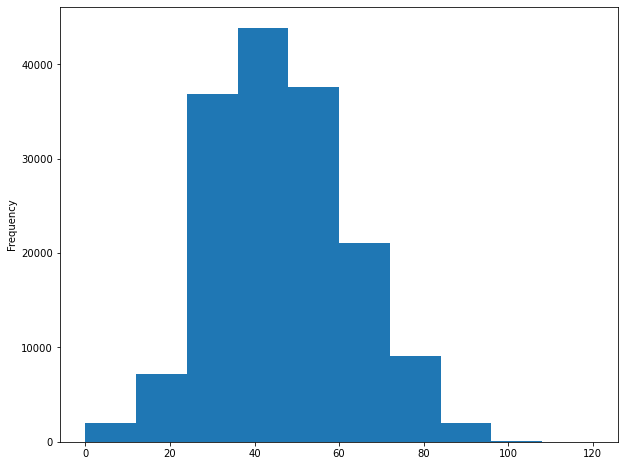

In [23]:
## Question 2
plt = dataframe["AGE"].plot(kind="hist", bins=10, figsize=(10,8))
plt.figure.savefig('Q2_histogram.png')
plt

### Question 3

In [24]:
## Question 3
bins = [0,10,20,30,40,50,60,70,80,90,100]

group = dataframe.groupby(['SEX',pd.cut(dataframe.AGE, bins)])
group.size().unstack()
#

AGE,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]"
SEX,,,,,,,,,,
Female,729,1888,11223,16390,16240,12388,7212,3628,1443,209
Male,783,1886,11823,19313,20026,17013,10241,5162,1691,216


### Question 4

In [25]:
## Question 4
filter = dataframe['INTUBATED'] == 'YES'
dataframe[filter].shape[0]

4828

### Question 5

In [26]:
## Question 5
diseases_and_ICU = list(['DIABETES', 'COPD', 'ASTHMA', 'INMUSUPR', 'HYPERTENSION', 'OTHER_DISEASE', 'ICU'])

In [27]:
corr_disease = unmodified[diseases_and_ICU].corr()
corr_disease

,DIABETES,COPD,ASTHMA,INMUSUPR,HYPERTENSION,OTHER_DISEASE,ICU
DIABETES,1.000000,0.847660,0.853429,0.820727,0.854574,0.708794,-0.008068
COPD,0.847660,1.000000,0.930534,0.890390,0.877483,0.765948,-0.019711
ASTHMA,0.853429,0.930534,1.000000,0.907258,0.884746,0.777309,-0.023228
INMUSUPR,0.820727,0.890390,0.907258,1.000000,0.861896,0.805040,-0.023368
HYPERTENSION,0.854574,0.877483,0.884746,0.861896,1.000000,0.756025,-0.008134
OTHER_DISEASE,0.708794,0.765948,0.777309,0.805040,0.756025,1.000000,-0.033712
ICU,-0.008068,-0.019711,-0.023228,-0.023368,-0.008134,-0.033712,1.000000


<AxesSubplot:>

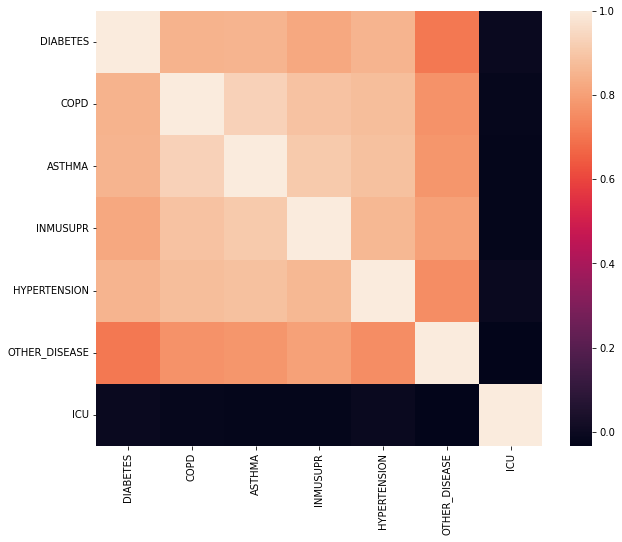

In [28]:
import seaborn as sns;
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(corr_disease)

### Question 6

In [29]:
## Question 6
filter = dataframe['DATE_OF_DEATH'].notnull()
dataframe.loc[filter, 'DIABETES':'OTHER_DISEASE'][dataframe == 'YES'].count().sort_values(ascending=False).idxmax()

'HYPERTENSION'

### Question 7

In [30]:
## Question 8
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [31]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [105]:
df1 = dataframe.copy()
df1

,ORIGIN,SECTOR,TREATMENT_LOCATION,SEX,BIRTHPLACE_LOCATION,PATIENT_LOCATION,MUNICIPALITY,HOSPITALIZED,ADMISSION DATE,DATE_OF_FIRST_SYMPTOM,...,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,CHRONIC_KIDNEY,TOBACCO,ANOTHER CASE,OUTCOME,MIGRANT,COUNTRY OF ORIGIN,ICU
0,OUTSIDE USMER,STATE,2,Female,2,2,4,NO,2020-04-22,2020-04-18,...,NO,NO,NO,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
1,OUTSIDE USMER,STATE,15,Male,15,15,33,YES,2020-05-18,2020-05-15,...,NO,NO,NO,YES,NO,NO,POSITIVE,UNKNOWN,99,NO
2,OUTSIDE USMER,STATE,2,Female,2,2,2,NO,2020-05-22,2020-05-19,...,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
3,OUTSIDE USMER,STATE,15,Male,9,15,87,NO,2020-06-05,2020-06-04,...,NO,NO,NO,NO,YES,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
4,OUTSIDE USMER,IMSS,25,Male,25,25,6,NO,2020-04-22,2020-04-18,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159788,USMER,SSA,25,Male,25,25,9,NO,2020-06-02,2020-05-23,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159789,USMER,SSA,22,Female,22,22,12,YES,2020-06-04,2020-06-02,...,NO,NO,NO,NO,NO,NO,POSITIVE,UNKNOWN,99,NO
159790,OUTSIDE USMER,SSA,12,Male,12,12,50,NO,2020-06-04,2020-06-03,...,NO,NO,YES,NO,NO,YES,POSITIVE,UNKNOWN,99,DOES NOT APPLY
159791,OUTSIDE USMER,IMSS,15,Male,15,15,39,NO,2020-06-04,2020-06-02,...,NO,NO,NO,NO,NO,UNKNOWN,POSITIVE,UNKNOWN,99,DOES NOT APPLY


In [106]:
filter = (df1['ICU'].str.contains('UNKNOWN') | df1['ICU'].str.contains('DOES NOT APPLY'))
df1.drop(df1.index[filter], inplace=True)

In [107]:
df1['ICU'] = np.where(df1['ICU'] == 'YES', '1', df1['ICU'])
df1['ICU'] = np.where(df1['ICU'] == 'NO', '0', df1['ICU'])
df1['ICU'] = df1['ICU'].astype(str).astype(int)

In [108]:
df1.dtypes

ORIGIN                    object
SECTOR                    object
TREATMENT_LOCATION         int64
SEX                       object
BIRTHPLACE_LOCATION        int64
PATIENT_LOCATION           int64
MUNICIPALITY               int64
HOSPITALIZED              object
ADMISSION DATE            object
DATE_OF_FIRST_SYMPTOM     object
DATE_OF_DEATH             object
INTUBATED                 object
PNEUMONIA                 object
AGE                        int64
NATIONALITY               object
PREGNANCY                 object
SPEAKS_NATIVE_LANGUAGE    object
DIABETES                  object
COPD                      object
ASTHMA                    object
INMUSUPR                  object
HYPERTENSION              object
OTHER_DISEASE             object
CARDIOVASCULAR            object
OBESITY                   object
CHRONIC_KIDNEY            object
TOBACCO                   object
ANOTHER CASE              object
OUTCOME                   object
MIGRANT                   object
COUNTRY OF

In [109]:
df1['ICU'].value_counts()

0    46510
1     4654
Name: ICU, dtype: int64

In [110]:
df1.shape

(51164, 32)

In [111]:
def split_date(df1):
    return df1.join(
        df1['ADMISSION DATE']
        # Split date
        .str.split('-', expand=True)
        .rename(columns={0: 'ADMISSION_YEAR', 1: 'ADMISSION_MONTH', 2: 'ADMISSION_DATE'})
    )

df1 = df1.pipe(split_date)

In [112]:
df1.drop(['ADMISSION DATE', 'BIRTHPLACE_LOCATION', 'DATE_OF_FIRST_SYMPTOM', 'DATE_OF_DEATH', 'MUNICIPALITY', 'COUNTRY OF ORIGIN'], axis=1, inplace=True)
df1.shape

(51164, 29)

In [113]:
df1.dtypes

ORIGIN                    object
SECTOR                    object
TREATMENT_LOCATION         int64
SEX                       object
PATIENT_LOCATION           int64
HOSPITALIZED              object
INTUBATED                 object
PNEUMONIA                 object
AGE                        int64
NATIONALITY               object
PREGNANCY                 object
SPEAKS_NATIVE_LANGUAGE    object
DIABETES                  object
COPD                      object
ASTHMA                    object
INMUSUPR                  object
HYPERTENSION              object
OTHER_DISEASE             object
CARDIOVASCULAR            object
OBESITY                   object
CHRONIC_KIDNEY            object
TOBACCO                   object
ANOTHER CASE              object
OUTCOME                   object
MIGRANT                   object
ICU                        int32
ADMISSION_YEAR            object
ADMISSION_MONTH           object
ADMISSION_DATE            object
dtype: object

In [114]:
col_list = [col for col in df1.columns.tolist() if df1[col].dtype.name == "object"]
df_oh = df1[col_list]
df1 = df1.drop(col_list, 1)
df_oh = pd.get_dummies(df_oh)
df1 = pd.concat([df1, df_oh], axis=1)
df1.head()

,TREATMENT_LOCATION,PATIENT_LOCATION,AGE,ICU,ORIGIN_OUTSIDE USMER,ORIGIN_USMER,SECTOR_ACADEMIC,SECTOR_DIF,SECTOR_IMSS,SECTOR_ISSSTE,...,ADMISSION_DATE_22,ADMISSION_DATE_23,ADMISSION_DATE_24,ADMISSION_DATE_25,ADMISSION_DATE_26,ADMISSION_DATE_27,ADMISSION_DATE_28,ADMISSION_DATE_29,ADMISSION_DATE_30,ADMISSION_DATE_31
1,15,15,35,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,15,15,79,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,15,15,55,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,15,15,66,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,15,15,43,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
y = df1.ICU
X = df1.drop("ICU", 1)
colnames = X.columns
pd.DataFrame.to_csv(df1, 'cleaned.csv')

### Question 8

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1) 

rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)

rf.fit(X_train, y_train)

accuracy_score(y_test, rf.predict(X_test))

boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)
boruta_selector.fit(np.array(X_train), np.array(y_train)) 

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	108
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	16
Tentative: 	4
Rejected: 	88
Iteration: 	9 / 100
Confirmed: 	16
Tentative: 	4
Rejected: 	88
Iteration: 	10 / 100
Confirmed: 	16
Tentative: 	4
Rejected: 	88
Iteration: 	11 / 100
Confirmed: 	16
Tentative: 	4
Rejected: 	88
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	4
Rejected: 	88
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	89
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	89
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	89
Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	3

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=120,
                                          random_state=RandomState(MT19937) at 0x1D16A898940),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1D16A898940, verbose=2)

In [220]:
print("Ranking: ",boruta_selector.ranking_)          
print("No. of significant features: ", boruta_selector.n_features_) 

Ranking:  [ 1  1  1  1  1 77 89  1  1 84 40  7  1 89  4  1  1  6  9 12 89  1  1  1
  1 64 74 10 80 11 78 21 13 56 15 14 15 26 62 56 19 34 42 29 33 44 32 23
 23 20 27 23 30 37 42 25  4  3 17 48 58 30 45 66  1  1  1 89 80 83 85 89
 78  8  1 18  2 82 60 72 46 53 28 34 39 64 54 68 64 36 51 49 76 37 70 50
 70 86 52 66 59 74 56 61 40 68 47 72]
No. of significant features:  18


In [221]:
boruta_score = ranking(list(map(float, boruta_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [289]:
print('---------Top 20----------')
boruta_top20 = boruta_score.head(20)
display(boruta_top20)
pd.DataFrame.to_csv(boruta_top20, 'Boruta_Top20.csv')

---------Top 20----------


,Features,Score
0,TREATMENT_LOCATION,1.00
21,INTUBATED_NO,1.00
23,PNEUMONIA_NO,1.00
16,SECTOR_SSA,1.00
15,SECTOR_SEMAR,1.00
24,PNEUMONIA_YES,1.00
12,SECTOR_PRIVATE,1.00
74,ADMISSION_MONTH_04,1.00
66,ANOTHER CASE_YES,1.00
65,ANOTHER CASE_UNKNOWN,1.00


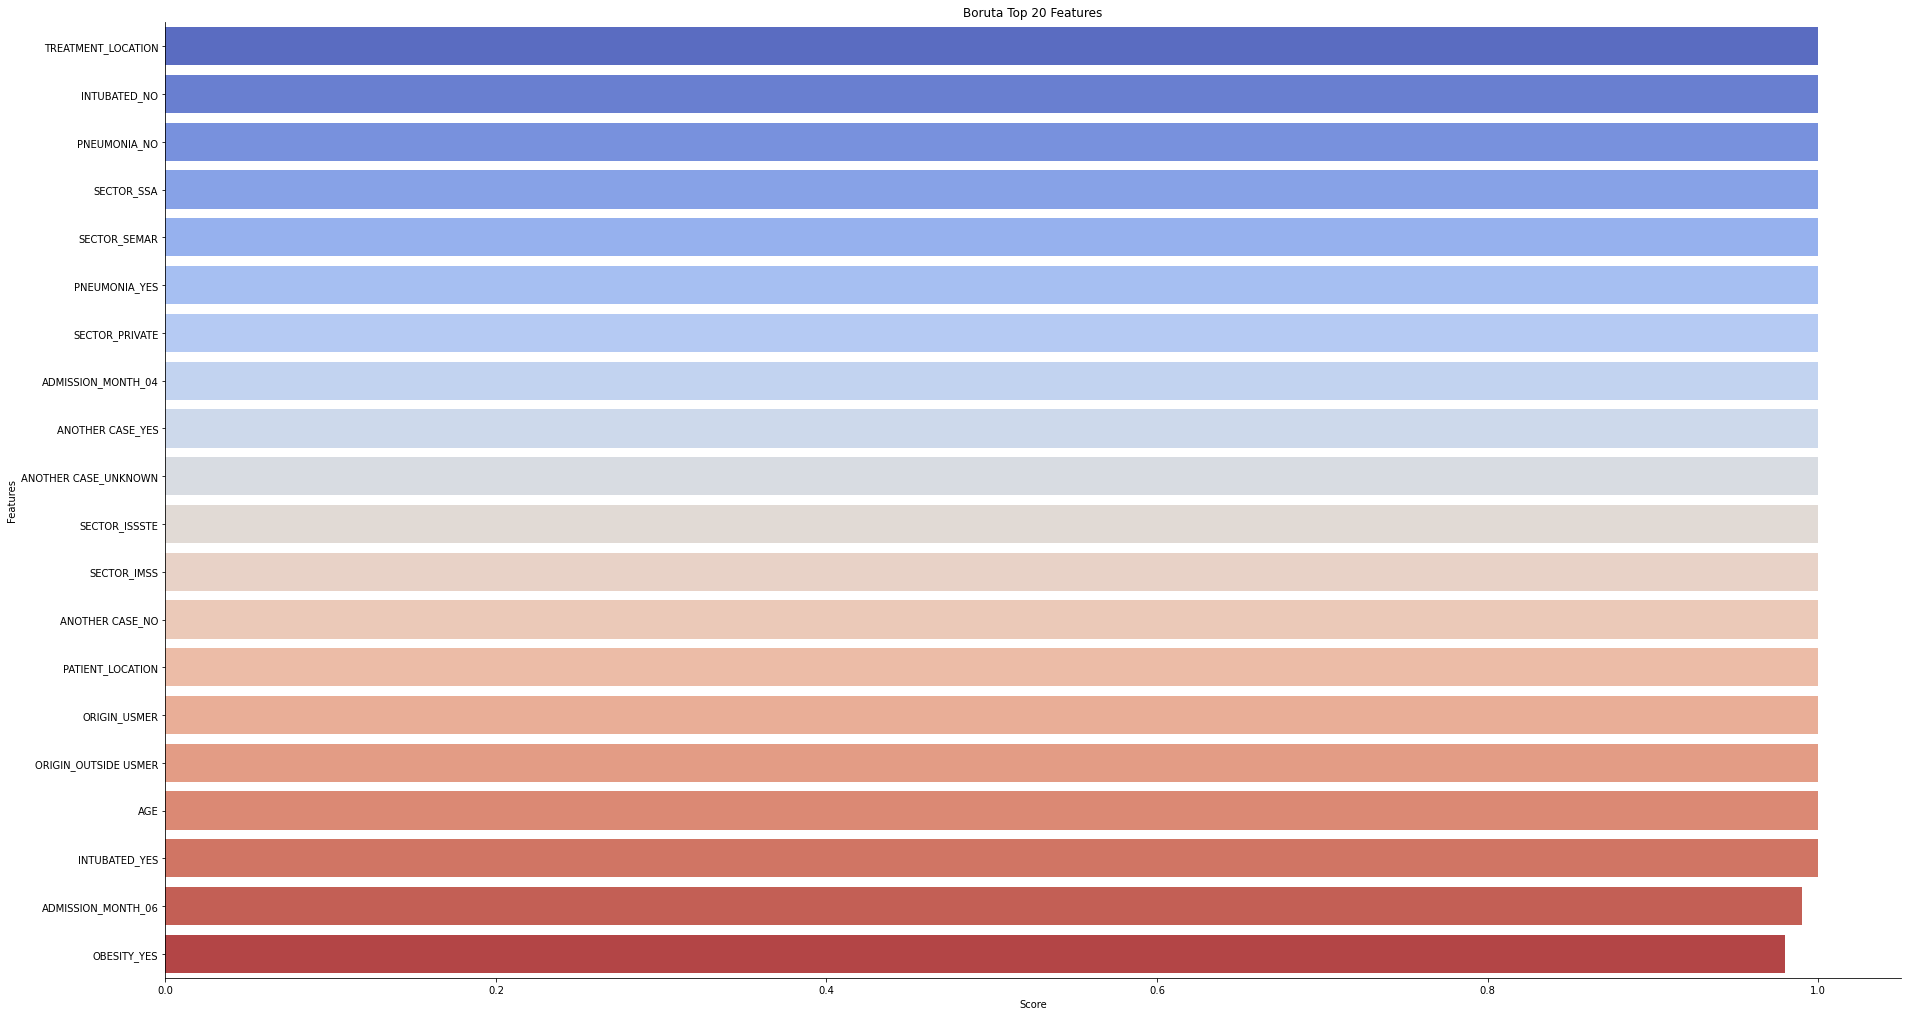

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:20], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')

plt.title("Boruta Top 20 Features")
sns_boruta_plot.figure.savefig('Q8_boruta.png')

In [224]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
rf.fit(X, y)
rfe = RFECV(rf, min_features_to_select = 1, cv = 3)

In [225]:
rfe.fit(X, y)

RFECV(cv=3,
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                       n_jobs=-1))

In [228]:
rfe_score = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
rfe_score = pd.DataFrame(list(rfe_score.items()), columns=['Features', 'Score'])
rfe_score = rfe_score.sort_values("Score", ascending = False)

In [290]:
print('---------Top 20----------')
rfe_top20 = rfe_score.head(20)
display(rfe_top20)
pd.DataFrame.to_csv(rfe_top20, 'RFE_Top20.csv')

---------Top 20----------


,Features,Score
22,INTUBATED_YES,1.00
7,SECTOR_IMSS,0.99
21,INTUBATED_NO,0.98
0,TREATMENT_LOCATION,0.97
1,PATIENT_LOCATION,0.96
65,ANOTHER CASE_UNKNOWN,0.95
23,PNEUMONIA_NO,0.94
16,SECTOR_SSA,0.93
2,AGE,0.93
24,PNEUMONIA_YES,0.92


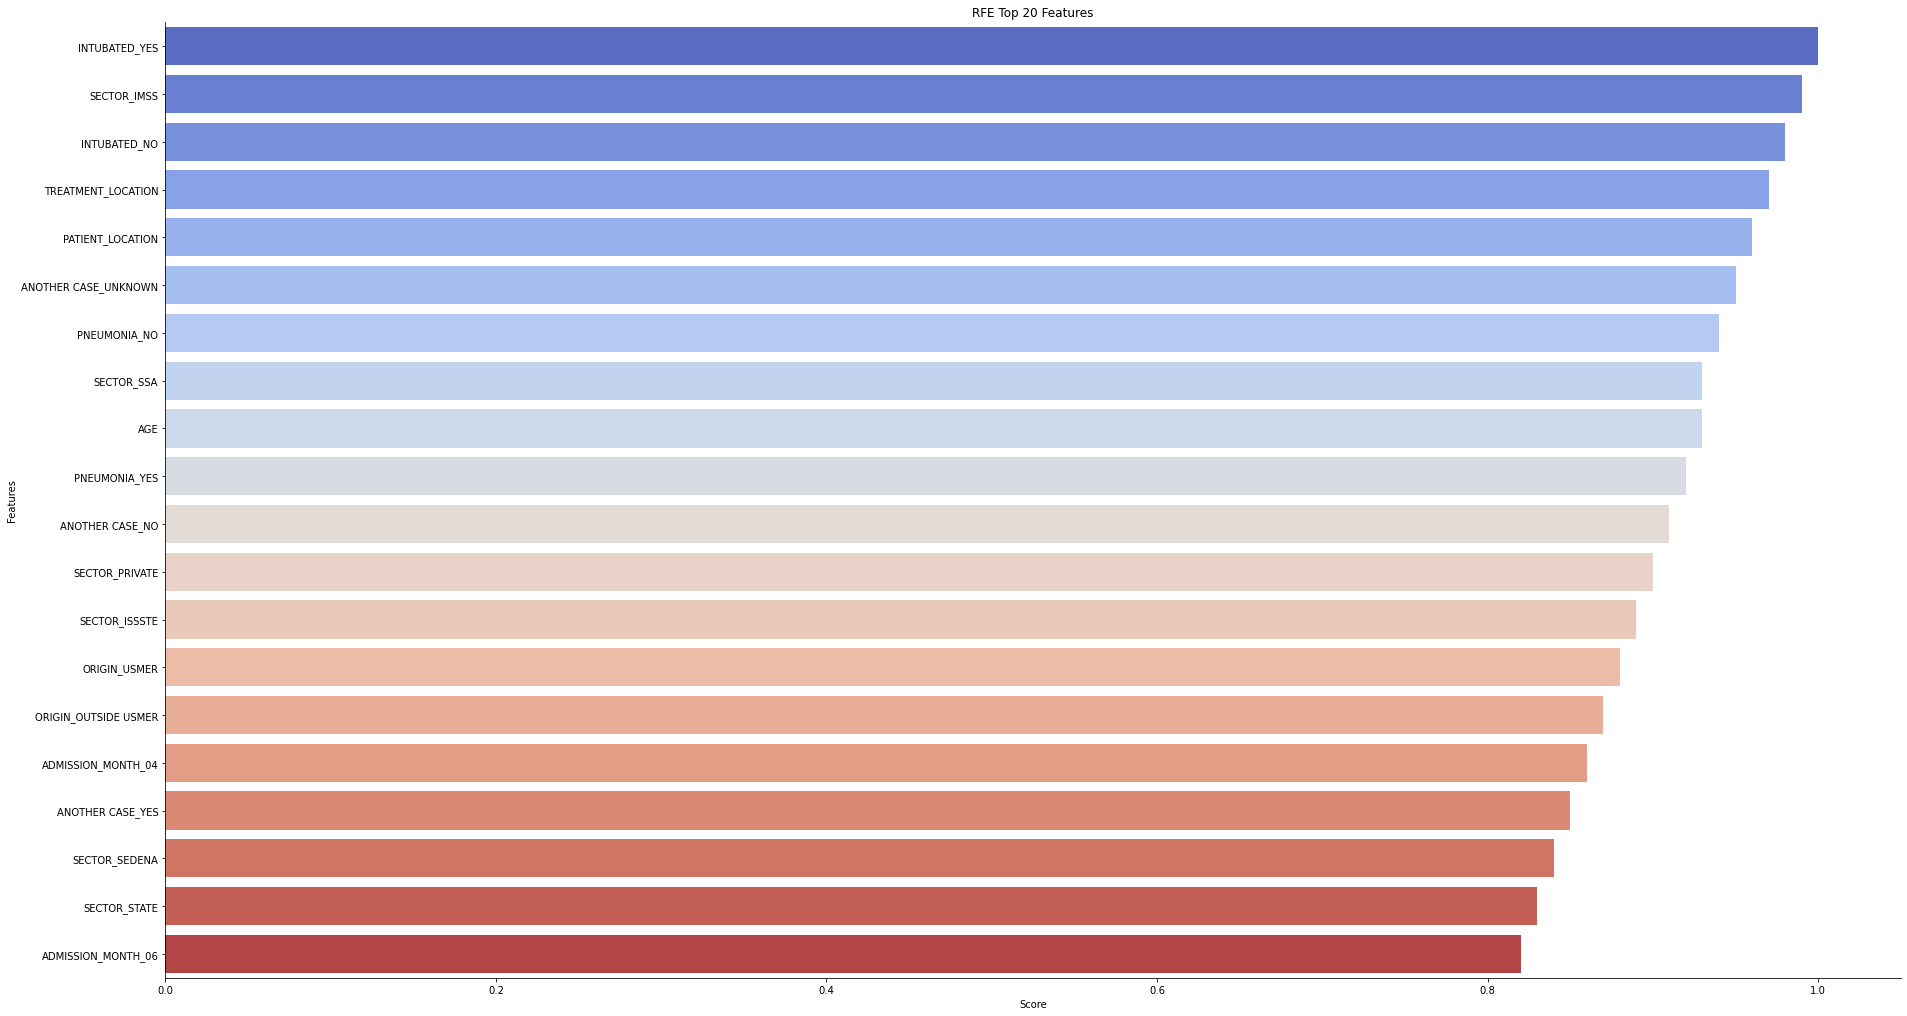

In [232]:
sns_rfe_plot = sns.catplot(x="Score", y="Features", data = rfe_score[:20], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("RFE Top 20 Features")
sns_rfe_plot.figure.savefig('Q8_rfe.png')

### Question 9

In [291]:
## Question 9

## Top N features of BORUTA
top_20_features = boruta_score.Features[:20].tolist()
top_20_features

['TREATMENT_LOCATION',
 'INTUBATED_NO',
 'PNEUMONIA_NO',
 'SECTOR_SSA',
 'SECTOR_SEMAR',
 'PNEUMONIA_YES',
 'SECTOR_PRIVATE',
 'ADMISSION_MONTH_04',
 'ANOTHER CASE_YES',
 'ANOTHER CASE_UNKNOWN',
 'SECTOR_ISSSTE',
 'SECTOR_IMSS',
 'ANOTHER CASE_NO',
 'PATIENT_LOCATION',
 'ORIGIN_USMER',
 'ORIGIN_OUTSIDE USMER',
 'AGE',
 'INTUBATED_YES',
 'ADMISSION_MONTH_06',
 'OBESITY_YES']

In [292]:
score_dict = {}
for n in range(5, 21):
    top_n_features = top_20_features[:n]
    iter_y = df1.ICU
    iter_X = df1[top_n_features]
    iter_X_train, iter_X_test, iter_y_train, iter_y_test = train_test_split(iter_X, iter_y, test_size = .2, random_state = 1) 

    rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)

    rf.fit(iter_X_train, iter_y_train)

    score = accuracy_score(iter_y_test, rf.predict(iter_X_test))
    print("Top ",n, "features : ", score)
    score_dict[n] = score
    # rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
    # rf.fit(X, y)

Top  5 features :  0.9220170038111991
Top  6 features :  0.9220170038111991
Top  7 features :  0.9234828496042217
Top  8 features :  0.9205511580181764
Top  9 features :  0.9234828496042217
Top  10 features :  0.9201602658067038
Top  11 features :  0.9189875891722857
Top  12 features :  0.9170331281149223
Top  13 features :  0.9164467897977133
Top  14 features :  0.9155672823218998
Top  15 features :  0.9155672823218998
Top  16 features :  0.918010358643604
Top  17 features :  0.9179126355907359
Top  18 features :  0.9244600801329034
Top  19 features :  0.9247532492915078
Top  20 features :  0.924264634027167


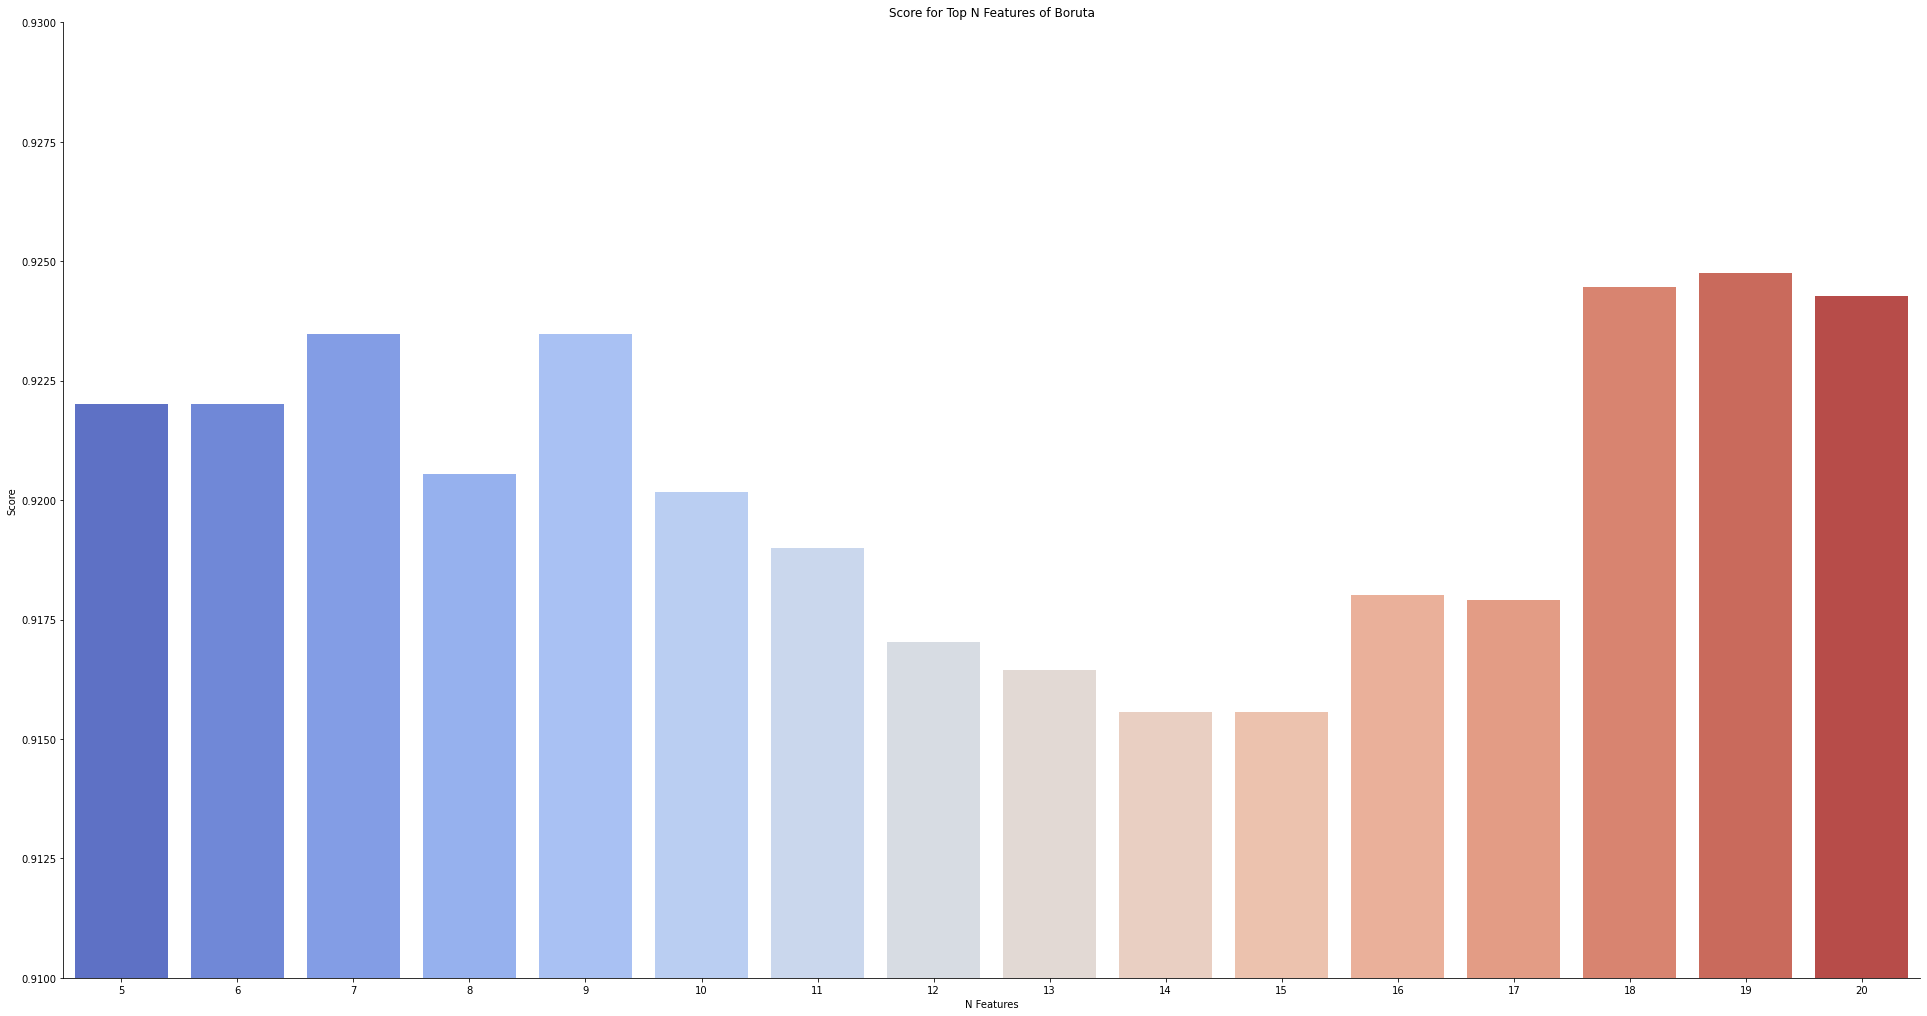

In [293]:
score_data = pd.DataFrame(score_dict.items())
score_data = pd.DataFrame(score_dict.items(), columns=['N Features', 'Score'])
score_data["N Features"] = score_data["N Features"].astype('int32')

sns_score_plot = sns.catplot(x="N Features", y="Score", data = score_data, kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
sns_score_plot.set(ylim=[0.91, 0.93])
plt.title("Score for Top N Features of Boruta")
pd.DataFrame.to_csv(score_data, 'Boruta_Accuracy.csv')
sns_score_plot.figure.savefig('Q9_boruta.png')

In [294]:
## Top N features of RFE
rfe_score
top_20_features = rfe_score.Features[:20].tolist()
top_20_features

['INTUBATED_YES',
 'SECTOR_IMSS',
 'INTUBATED_NO',
 'TREATMENT_LOCATION',
 'PATIENT_LOCATION',
 'ANOTHER CASE_UNKNOWN',
 'PNEUMONIA_NO',
 'SECTOR_SSA',
 'AGE',
 'PNEUMONIA_YES',
 'ANOTHER CASE_NO',
 'SECTOR_PRIVATE',
 'SECTOR_ISSSTE',
 'ORIGIN_USMER',
 'ORIGIN_OUTSIDE USMER',
 'ADMISSION_MONTH_04',
 'ANOTHER CASE_YES',
 'SECTOR_SEDENA',
 'SECTOR_STATE',
 'ADMISSION_MONTH_06']

In [295]:
score_dict = {}
for n in range(5, 21):
    top_n_features = top_20_features[:n]
    iter_y = df1.ICU
    iter_X = df1[top_n_features]
    iter_X_train, iter_X_test, iter_y_train, iter_y_test = train_test_split(iter_X, iter_y, test_size = .2, random_state = 1) 

    rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)

    rf.fit(iter_X_train, iter_y_train)

    score = accuracy_score(iter_y_test, rf.predict(iter_X_test))
    print("Top ",n, "features : ", score)
    score_dict[n] = score
    # rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5, n_estimators=100)
    # rf.fit(X, y)

Top  5 features :  0.9221147268640673
Top  6 features :  0.92250561907554
Top  7 features :  0.9207466041239128
Top  8 features :  0.9210397732825173
Top  9 features :  0.9217238346525946
Top  10 features :  0.9221147268640673
Top  11 features :  0.9211374963353856
Top  12 features :  0.9220170038111991
Top  13 features :  0.9260236489787941
Top  14 features :  0.9241669109742988
Top  15 features :  0.9244600801329034
Top  16 features :  0.9250464184501124
Top  17 features :  0.9247532492915078
Top  18 features :  0.9241669109742988
Top  19 features :  0.9253395876087169
Top  20 features :  0.924264634027167


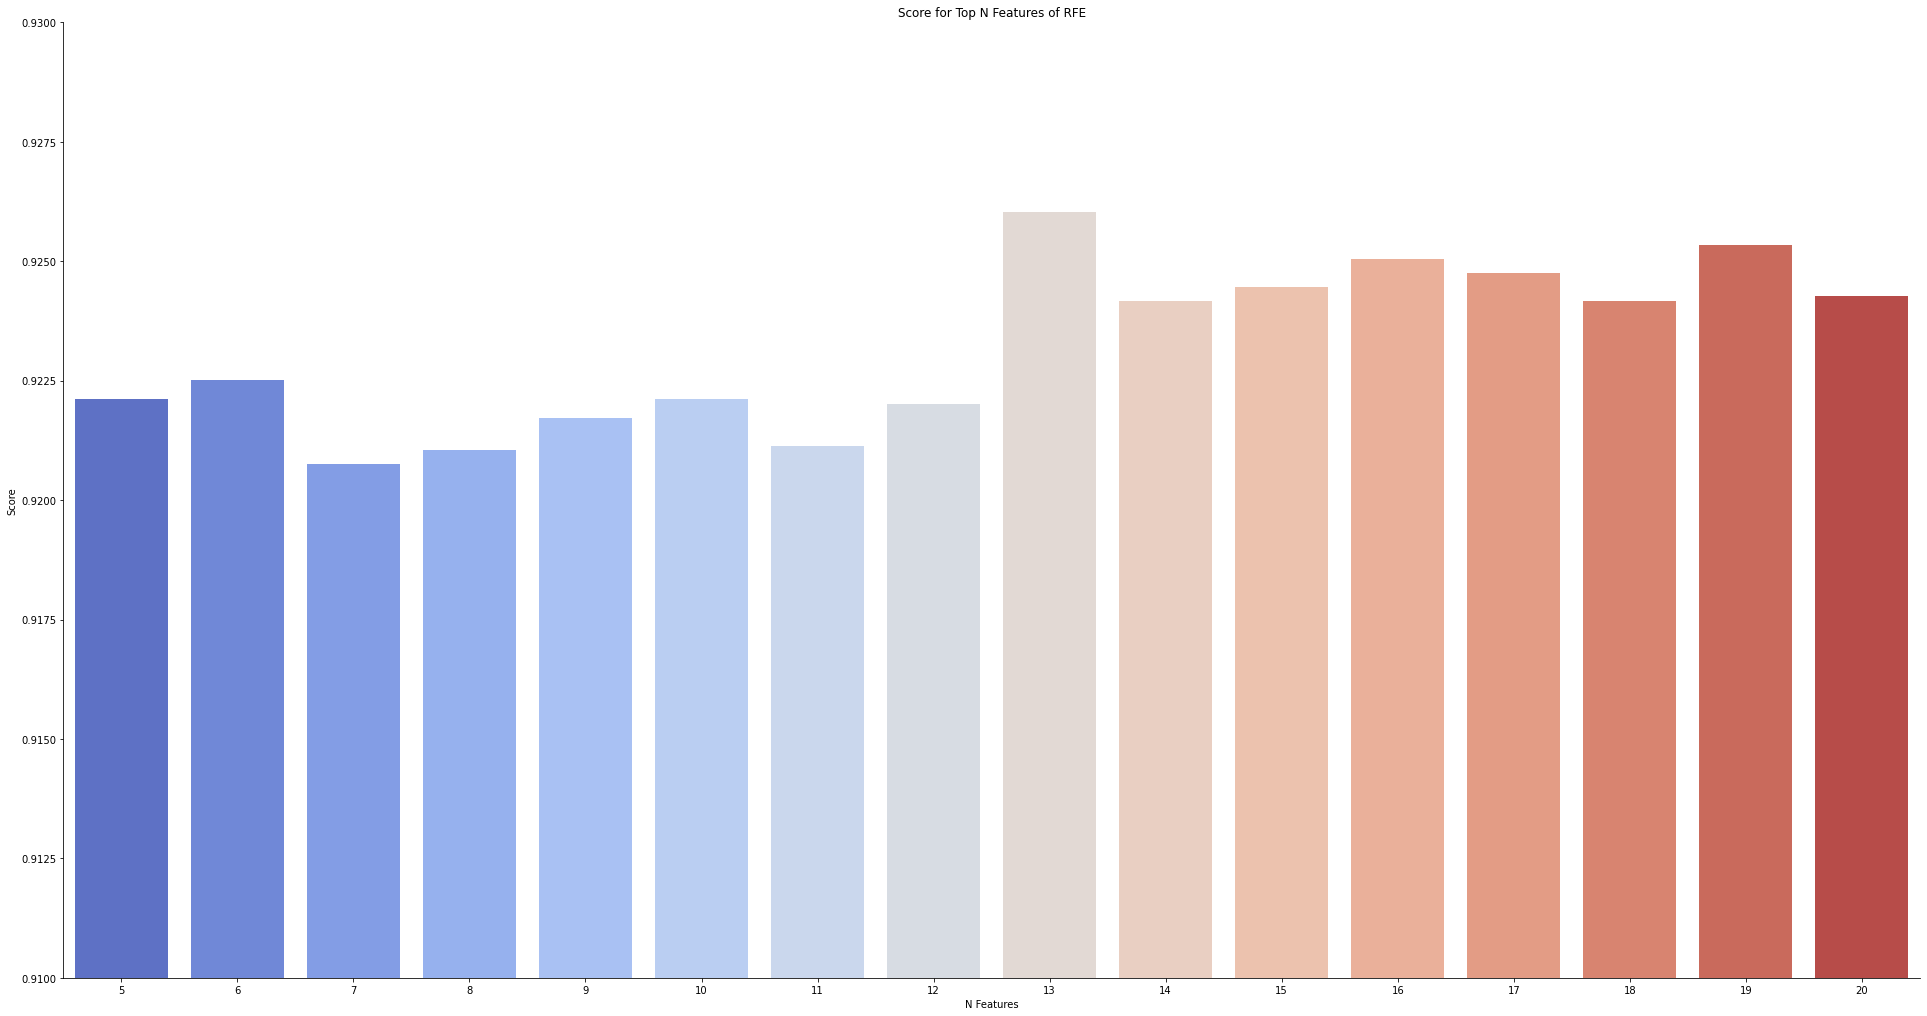

In [296]:
score_data = pd.DataFrame(score_dict.items())
score_data = pd.DataFrame(score_dict.items(), columns=['N Features', 'Score'])
score_data["N Features"] = score_data["N Features"].astype('int32')

sns_score_plot = sns.catplot(x="N Features", y="Score", data = score_data, kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
sns_score_plot.set(ylim=[0.91, 0.93])
plt.title("Score for Top N Features of RFE")
pd.DataFrame.to_csv(score_data, 'RFE_Accuracy.csv')
sns_score_plot.figure.savefig('Q9_rfe.png')

### Question 10

In [100]:
## Question 10
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [117]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [118]:
#Accuracy

print("Accuracy on training set: {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))

Accuracy on training set: 0.819
Accuracy on test set: 0.822


In [119]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[11714  2289]
 [  437   910]]
**********************
Mjority TN=  11714
Mjority FP= 2289
Mjority FN=  437
Mjority TP=  910
**********************
Precision= 0.28
Recall= 0.68
F1= 0.40
Accuracy= 0.82


In [120]:
#AUC
prob_NB = nb.predict_proba(X_test)
prob_NB = prob_NB[:, 1]

auc_NB= roc_auc_score(y_test, prob_NB)
print('AUC: %.2f' % auc_NB)

AUC: 0.82


In [125]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, output_dict=True)
result = pd.DataFrame(report).transpose()

pd.DataFrame.to_csv(result, 'NB_Report.csv')

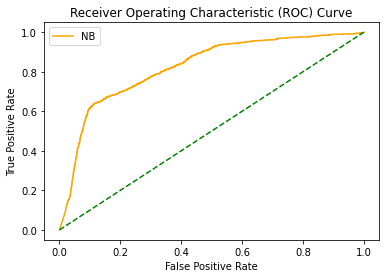

In [63]:
fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, prob_NB) 

plt.plot(fpr_NB, tpr_NB, color='orange', label='NB') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend().figure.savefig('Q10_roc.png')


### Question 11

In [94]:
# Question 11
from sklearn.ensemble import RandomForestClassifier

In [126]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [127]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.908
Accuracy on test set: 0.913


In [128]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[14003     0]
 [ 1340     7]]
**********************
Mjority TN=  14003
Mjority FP= 0
Mjority FN=  1340
Mjority TP=  7
**********************
Precision= 1.00
Recall= 0.01
F1= 0.01
Accuracy= 0.91


In [129]:
#AUC
prob_RF = rf.predict_proba(X_test)
prob_RF = prob_RF[:, 1]

auc_RF= roc_auc_score(y_test, prob_RF)
print('AUC: %.2f' % auc_RF)

AUC: 0.88


In [130]:
report = classification_report(y_test, y_pred, output_dict=True)
result = pd.DataFrame(report).transpose()

pd.DataFrame.to_csv(result, 'RF_Report.csv')

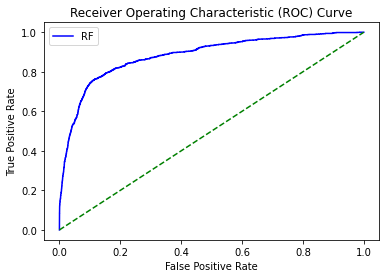

In [99]:
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, prob_RF) 

plt.plot(fpr_RF, tpr_RF, color='blue', label='RF') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend().figure.savefig('Q11_roc.png')

### Question 12

In [131]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

In [132]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(KNN.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(KNN.score(X_test, y_test)))

Accuracy on training set: 0.943
Accuracy on test set: 0.914


In [133]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[13727   276]
 [ 1045   302]]
**********************
Mjority TN=  13727
Mjority FP= 276
Mjority FN=  1045
Mjority TP=  302
**********************
Precision= 0.52
Recall= 0.22
F1= 0.31
Accuracy= 0.91


In [134]:
#AUC
prob_KNN = KNN.predict_proba(X_test)
prob_KNN = prob_KNN[:, 1]

auc_KNN = roc_auc_score(y_test, prob_KNN)
print('AUC: %.2f' % auc_KNN)

AUC: 0.73


In [135]:
report = classification_report(y_test, y_pred, output_dict=True)
result = pd.DataFrame(report).transpose()

pd.DataFrame.to_csv(result, 'KNN_Report.csv')

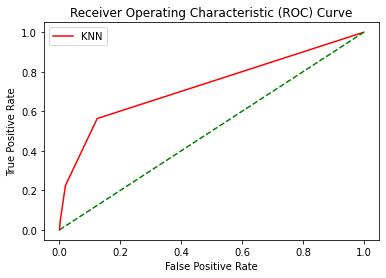

In [93]:
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, prob_KNN) 

plt.plot(fpr_KNN, tpr_KNN, color='red', label='KNN') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend().figure.savefig('Q12_roc.png')

### Question 13

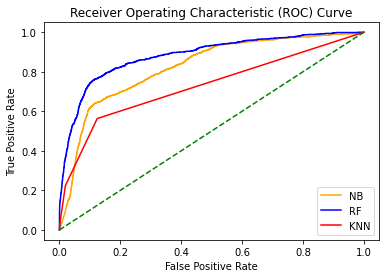

In [268]:
# Question 13
plt.plot(fpr_NB, tpr_NB, color='orange', label='NB')
plt.plot(fpr_RF, tpr_RF, color='blue', label='RF')
plt.plot(fpr_KNN, tpr_KNN, color='red', label='KNN')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend().figure.savefig('Q13_roc.png')

## Question 14

In [136]:
## Question 14
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['ICU'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['ICU']==0]))
print("Number of subscription",len(os_data_y[os_data_y['ICU']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['ICU']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['ICU']==1])/len(os_data_X))

length of oversampled data is  65014
Number of no subscription in oversampled data 32507
Number of subscription 32507
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [137]:
## Question 10
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [138]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)

In [139]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [140]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))

Accuracy on training set: 0.923
Accuracy on test set: 0.923


In [141]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[9517  137]
 [1361 8490]]
**********************
Mjority TN=  9517
Mjority FP= 137
Mjority FN=  1361
Mjority TP=  8490
**********************
Precision= 0.98
Recall= 0.86
F1= 0.92
Accuracy= 0.92


In [142]:
#AUC
prob_NB = nb.predict_proba(X_test)
prob_NB = prob_NB[:, 1]

auc_NB= roc_auc_score(y_test, prob_NB)
print('AUC: %.2f' % auc_NB)

AUC: 0.95


In [143]:
report = classification_report(y_test, y_pred, output_dict=True)
result = pd.DataFrame(report).transpose()

pd.DataFrame.to_csv(result, 'SMOTE_NB_Report.csv')

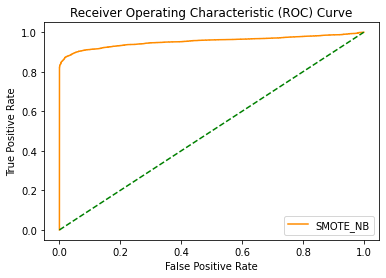

In [144]:
smote_fpr_NB, smote_tpr_NB, smote_thresholds_NB = roc_curve(y_test, prob_NB) 

plt.plot(smote_fpr_NB, smote_tpr_NB, color='darkorange', label='SMOTE_NB') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend().figure.savefig('Q14_nb_roc.png')

In [145]:
# Question 11
from sklearn.ensemble import RandomForestClassifier

In [146]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [147]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.905
Accuracy on test set: 0.906


In [148]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[9042  612]
 [1226 8625]]
**********************
Mjority TN=  9042
Mjority FP= 612
Mjority FN=  1226
Mjority TP=  8625
**********************
Precision= 0.93
Recall= 0.88
F1= 0.90
Accuracy= 0.91


In [149]:
#AUC
prob_RF = rf.predict_proba(X_test)
prob_RF = prob_RF[:, 1]

auc_RF= roc_auc_score(y_test, prob_RF)
print('AUC: %.2f' % auc_RF)

AUC: 0.95


In [150]:
report = classification_report(y_test, y_pred, output_dict=True)
result = pd.DataFrame(report).transpose()

pd.DataFrame.to_csv(result, 'SMOTE_RF_Report.csv')

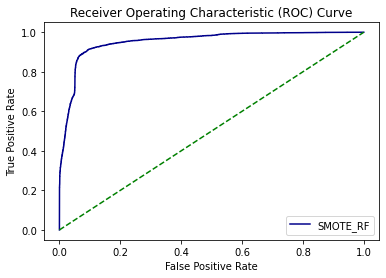

In [151]:
smote_fpr_RF, smote_tpr_RF, smote_thresholds_RF = roc_curve(y_test, prob_RF) 

plt.plot(smote_fpr_RF, smote_tpr_RF, color='darkblue', label='SMOTE_RF') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend().figure.savefig('Q14_rfe_roc.png')

In [152]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

In [153]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(KNN.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(KNN.score(X_test, y_test)))

Accuracy on training set: 0.959
Accuracy on test set: 0.924


In [154]:
#Confusion Matrix
confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

print('**********************')
print('Mjority TN= ', confusion_majority[0][0])
print('Mjority FP=', confusion_majority[0][1])
print('Mjority FN= ', confusion_majority[1][0])
print('Mjority TP= ', confusion_majority[1][1])
print('**********************')

print('Precision= {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred)))
print('F1= {:.2f}'. format(f1_score(y_test, y_pred)))
print('Accuracy= {:.2f}'. format(accuracy_score(y_test, y_pred)))

Mjority classifier Confusion Matrix
 [[8221 1433]
 [  42 9809]]
**********************
Mjority TN=  8221
Mjority FP= 1433
Mjority FN=  42
Mjority TP=  9809
**********************
Precision= 0.87
Recall= 1.00
F1= 0.93
Accuracy= 0.92


In [155]:
#AUC
prob_KNN = KNN.predict_proba(X_test)
prob_KNN = prob_KNN[:, 1]

auc_KNN = roc_auc_score(y_test, prob_KNN)
print('AUC: %.2f' % auc_KNN)

AUC: 0.96


In [156]:
report = classification_report(y_test, y_pred, output_dict=True)
result = pd.DataFrame(report).transpose()

pd.DataFrame.to_csv(result, 'SMOTE_KNN_Report.csv')

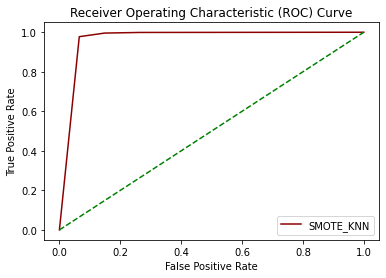

In [287]:
smote_fpr_KNN, smote_tpr_KNN, smote_thresholds_KNN = roc_curve(y_test, prob_KNN) 

plt.plot(smote_fpr_KNN, smote_tpr_KNN, color='darkred', label='SMOTE_KNN') 
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend().figure.savefig('Q14_knn_roc.png')

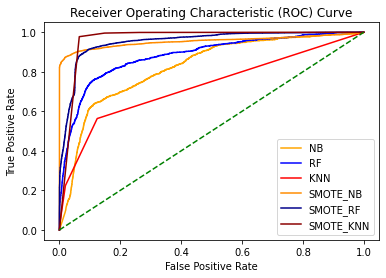

In [288]:
# Question 13
plt.plot(fpr_NB, tpr_NB, color='orange', label='NB')
plt.plot(fpr_RF, tpr_RF, color='blue', label='RF')
plt.plot(fpr_KNN, tpr_KNN, color='red', label='KNN')
plt.plot(smote_fpr_NB, smote_tpr_NB, color='darkorange', label='SMOTE_NB')
plt.plot(smote_fpr_RF, smote_tpr_RF, color='darkblue', label='SMOTE_RF')
plt.plot(smote_fpr_KNN, smote_tpr_KNN, color='darkred', label='SMOTE_KNN')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend().figure.savefig('Q14_overall_roc.png')